In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
df = pd.read_csv("homepage_actions.csv")

In [3]:
print (df.head(10),df.tail(10))

                    timestamp      id       group action
0  2016-09-24 17:42:27.839496  804196  experiment   view
1  2016-09-24 19:19:03.542569  434745  experiment   view
2  2016-09-24 19:36:00.944135  507599  experiment   view
3  2016-09-24 19:59:02.646620  671993     control   view
4  2016-09-24 20:26:14.466886  536734  experiment   view
5  2016-09-24 20:32:25.712659  681598  experiment   view
6  2016-09-24 20:39:03.248853  522116  experiment   view
7  2016-09-24 20:57:20.336757  349125  experiment   view
8  2016-09-24 20:58:01.948663  349125  experiment  click
9  2016-09-24 21:00:12.278374  560027     control   view                        timestamp      id       group action
8178  2017-01-18 08:17:12.675797  616692     control   view
8179  2017-01-18 08:53:50.910310  615849  experiment   view
8180  2017-01-18 08:54:56.879682  615849  experiment  click
8181  2017-01-18 09:07:37.661143  795585     control   view
8182  2017-01-18 09:09:17.363917  795585     control  click
8183  2017-01

In [4]:
control_df = df.query('group == "control"')
experiment_df = df.query('group == "experiment"')

In [5]:
control_ctr = control_df.query('action == "click"').id.nunique()/control_df.query('action == "view"').id.nunique()

In [6]:
experiment_ctr = experiment_df.query('action == "click"').id.nunique()/experiment_df.query('action == "view"').id.nunique()

In [7]:
obs_diff = experiment_ctr - control_ctr

In [8]:
print (obs_diff)

0.030034443684015644


In [9]:
# So, in this dataset, the experiment group has a higher click thru rate than the control group's click thru rate

In [10]:
# The click thru rate difference between control group and experiment group is about 3%
# We need to see if the difference is significant and not just due to chance

In [11]:
# So we decide to bootstrap the sample to simulate the sampling distribution for the difference in proportions.

In [12]:
# We will take a sample of mix of control group and experiment group, shuffle it, make it possible to choose a unique 
# value more than one time in this sample (replace=True), and the sample will be the whole df (df.shape[0])

In [13]:
diffs = []
for i in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique()/control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique()/experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

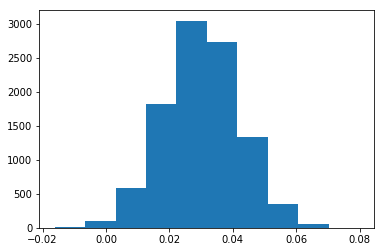

In [14]:
plt.hist(diffs);

In [15]:
# Calculate p-value: First, we assume the null hypothesis is true, to simulate from the null, we'll create a normal 
# distribution centered at zero, with the same standard deviation as our sampling distribution we simulate here.

In [16]:
diffs = np.array(diffs) # make the obj "diffs" became an array in numpy
null_vals = np.random.normal(0, diffs.std(), diffs.size)

(array([   9.,   53.,  427., 1418., 2579., 2807., 1902.,  653.,  137.,
          15.]),
 array([-0.04764013, -0.03844216, -0.02924419, -0.02004622, -0.01084825,
        -0.00165028,  0.00754769,  0.01674566,  0.02594362,  0.03514159,
         0.04433956]),
 <a list of 10 Patch objects>)

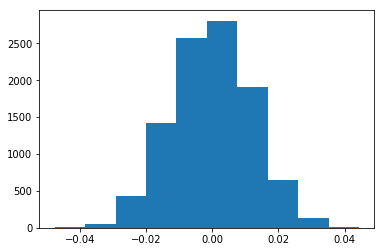

In [17]:
# The null distribution is plotted here:
plt.hist(null_vals)

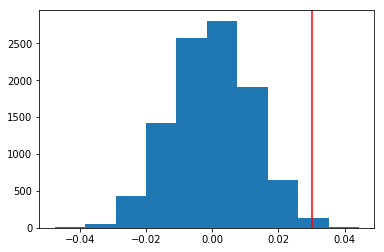

In [18]:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

In [20]:
print ((null_vals > obs_diff).mean())

0.0054


In [ ]:
# We cannot find the p-value like this as these are all the null values (null_vals) that are more extreme than our
# statistic in favor of our alternative. 
# In other words, we can see that the sampling distribution of the reality is different from the sampling distribution
# of the null hypothesis.
# With a p-value of approzimately 0.54%, the difference is significant, we can reject the null hypothesis.
# Remember: The null hypo is: CTR of new page <= CTR of old page; the alternative hypo is: CTR of new